In [0]:
# !sudo apt-get install build-essential swig
# !curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
# !pip install auto-sklearn


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier
import autosklearn.classification

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve 
from yellowbrick.classifier import ROCAUC


## Injestion 

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Barneybean/heart_disease_classification/master/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Data contains; 

age - age in years <br/> 
sex - (1 = male; 0 = female) <br/> 
cp - chest pain type <br/> 
trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br/> 
chol - serum cholestoral in mg/dl <br/> 
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br/> 
restecg - resting electrocardiographic results <br/> 
thalach - maximum heart rate achieved <br/> 
exang - exercise induced angina (1 = yes; 0 = no) <br/> 
oldpeak - ST depression induced by exercise relative to rest <br/> 
slope - the slope of the peak exercise ST segment <br/> 
ca - number of major vessels (0-3) colored by flourosopy <br/> 
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br/> 
target - have disease or not (1=yes, 0=no)<br/> 

## EDA

In [7]:
df.target.value_counts()


1    165
0    138
Name: target, dtype: int64

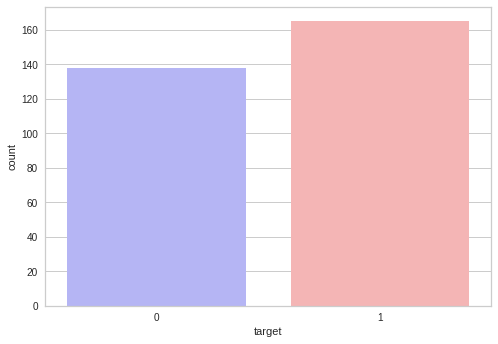

In [8]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

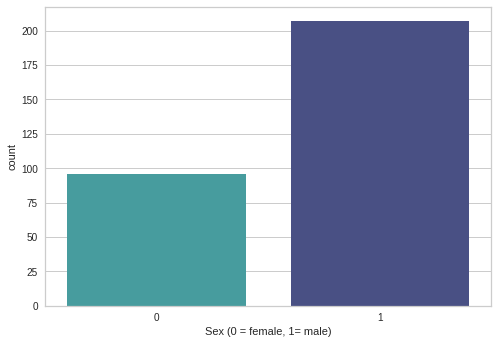

In [9]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

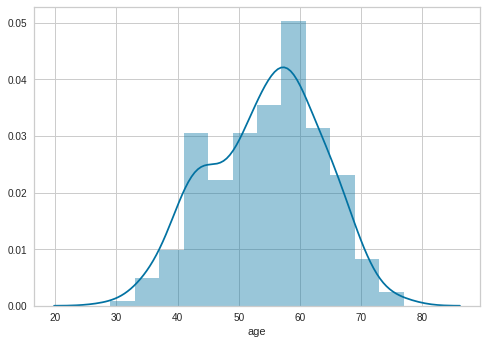

In [10]:
sns.distplot(df['age'])

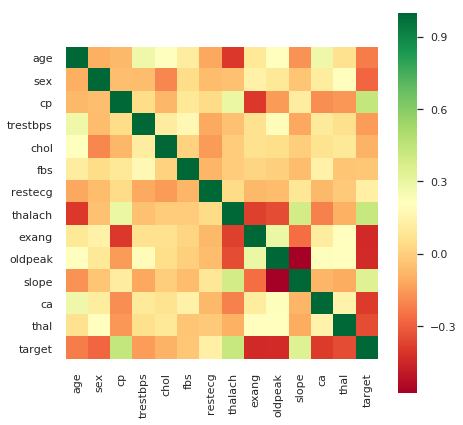

In [11]:
sns.set(rc={'figure.figsize':(7,7)})

sns.heatmap(df.iloc[:,:].corr(), square=True, cmap='RdYlGn')


In [12]:
# slope, fbs, chol are not so correlated with target, so exclude them from the modeling 
df_filtered = df.drop(['slope', 'fbs','chol','target'], axis=1)
df_filtered.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,ca,thal
0,63,1,3,145,0,150,0,2.3,0,1
1,37,1,2,130,1,187,0,3.5,0,2
2,41,0,1,130,0,172,0,1.4,0,2
3,56,1,1,120,1,178,0,0.8,0,2
4,57,0,0,120,1,163,1,0.6,0,2


[0.33222222 0.23437258 0.10612093 0.08914556 0.07491792 0.04524745
 0.04218399 0.03009312 0.0287053 ]


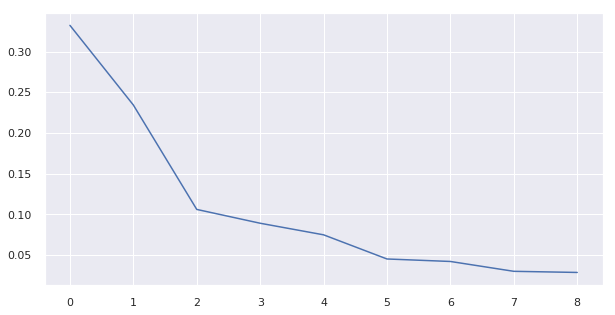

In [13]:
scaler = MinMaxScaler()
filtered_data_scaler = scaler.fit_transform(df_filtered)
plt.subplots(figsize=(10,5))
pca = PCA(n_components='mle')
pca.fit(filtered_data_scaler)
plt.plot(pca.explained_variance_ratio_[:10])
print(pca.explained_variance_ratio_)

In [14]:
components = pd.DataFrame(pca.components_[:3], columns = df_filtered.columns)
component_1 = components.iloc[0,:]
component_1[abs(component_1)>0.3]

sex      0.469268
cp      -0.356221
exang    0.762591
Name: 0, dtype: float64

In [15]:
component_2 = components.iloc[1,:]
component_2[abs(component_2)>0.3]

sex     -0.871557
exang    0.401908
Name: 1, dtype: float64

### 2 components seems ok but we are not deeling with a large dataset with large amount of data, so i decided to use variables that are correlated with target. 

## Model


In [0]:
y = df.target.values
X = df_filtered

#Normalize
x = (X - np.min(X)) / (np.max(X) - np.min(X)).values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)


### Logistic Regression

In [19]:
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Grid Search for Logistic Regression

In [0]:
#Create Hyperparameter Search Space
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [0]:
#Create Grid Search
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

In [0]:
#Conduct Grid Search
# Fit grid search
best_model = clf.fit(X_train, y_train)

In [23]:
#View Hyperparameter Values Of Best Model
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.7825594022071245


In [24]:
#Predict Using Best Model
# Predict target vector
y_pred_log = best_model.predict(X_test)
y_pred_log

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

#### Accessment and interpretation of the best model selected

In [25]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

[[44  8]
 [11 59]]
             precision    recall  f1-score   support

          0       0.80      0.85      0.82        52
          1       0.88      0.84      0.86        70

avg / total       0.85      0.84      0.84       122



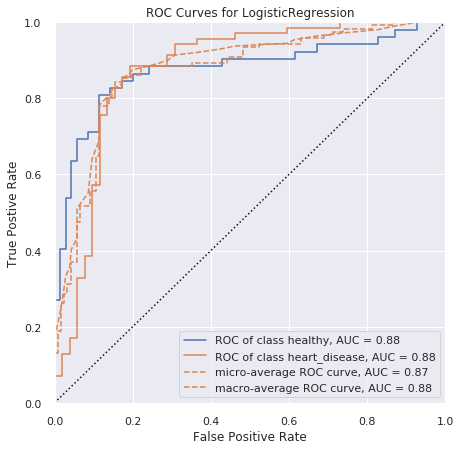

In [26]:
classes = ["healthy", "heart_disease"]
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(LogisticRegression(), classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

#### Interpretation performance - from business impact viewpoint (false negatives vs false positives)

In [0]:
precision = True Positive / (True Positive + False Positive)
recall = True Positive / (True Positive + False Negative)

In [0]:
The precision of 0.8 indicates that 80% of classified heart disease are actually having heart disease. This is a relative high precision but in real case, 
this type I error (20%) will waste medical resources and cases unecessary burdon to the patient.

The Recall of 0.85 indicates that 85% of patients with disease will be correctly detected but 15% will miss. This 15% is type II error. In this case, the 
15% miscclassifcation means delay of treatment because the algorithem failed to detect them. Given this analysis, this model needs improvement. 

### SVM

We have divided the data into training and testing sets. Now is the time to train our SVM on the training data. Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms. Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. This class takes one parameter, which is the kernel type. This is very important. In the case of a simple SVM we simply set this parameter as "linear" since simple SVMs can only classify linearly separable data. We will see non-linear kernels in the next section.

The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method. Execute the following code to train the algorithm:

In [27]:
svm = SVC(kernel='linear')  
svm.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
#Grid Search
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': (1, 0.25, 0.5, 0.75), 'gamma': (1, 2, 3, 'auto'), 'decision_function_shape': ('ovo', 'ovr'), 'shrinking': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
y_pred_SVC = svm.predict(X_test)  
y_pred_SVC

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

#### Accessment and interpretation of the best model selected

In [30]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_SVC))
print(classification_report(y_test, y_pred_SVC))

[[44  8]
 [10 60]]
             precision    recall  f1-score   support

          0       0.81      0.85      0.83        52
          1       0.88      0.86      0.87        70

avg / total       0.85      0.85      0.85       122



#### Interpretation performance - from business impact viewpoint (false negatives vs false positives)

In [0]:
The precision of 0.81 indicates that 81% of classified heart disease are actually having heart disease. This is a relative high precision but in real case, 
this type I error (19%) will waste medical resources and cases unecessary burdon to the patient.

The Recall of 0.85 indicates that 85% of patients with disease will be correctly detected but 15% will miss. This 15% is type II error. In this case, the 
15% miscclassifcation means delay of treatment because the algorithem failed to detect them. Given this analysis, this model needs improvement. 

### Random Forest Classifier


In [31]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_rf=clf.predict(X_test)
y_pred_rf

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [32]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[43  9]
 [11 59]]
             precision    recall  f1-score   support

          0       0.80      0.83      0.81        52
          1       0.87      0.84      0.86        70

avg / total       0.84      0.84      0.84       122



#### Interpretation performance - from business impact viewpoint (false negatives vs false positives)


In [0]:
The precision of 0.80 indicates that 80% of classified heart disease are actually having heart disease. This is a relative high precision but in real case, 
this type I error (20%) will waste medical resources and cases unecessary burdon to the patient.

The Recall of 0.83 indicates that 85% of patients with disease will be correctly detected but 17% will miss. This 15% is type II error. In this case, the 
15% miscclassifcation means delay of treatment because the algorithem failed to detect them. Given this analysis, this model needs improvement. 

## Auto ML

In [0]:
cls = autosklearn.classification.AutoSklearnClassifier()
cls.fit(X_train, y_train)
predictions = cls.predict(X_test)

/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-04-25 06:47:12,735:EnsembleBuilder(1):c5bd10dde54782a275d3d849b09aba04] Error loading /tmp/autosklearn_tmp_135_2813/.auto-sklearn/predictions_ensemble/predictions_ensemble_1_1.npy: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/autosklearn/ensemble_builder.py", line 316, in read_ensemble_preds
    y_ensemble = self._read_np_fn(fp=fp)
  File "/usr/local/lib/python3.6/dist-packages/autosklearn/ensemble_builder.py", line 645, in _read_np_fn
    predictions = np.load(fp)
  File "/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py", line 451, in load
    raise ValueError("Cannot load file containing pickled data "
ValueError: Cannot load file containing pickled data when allow_pickle=False

[WARNING] [2019-04-25 06:47:12,740:EnsembleBuilder(1):c5bd10dde54782a275d3d849b09aba04] No models better than random - using Dummy Score!


Process pynisher function call:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/usr/local/lib/python3.6/dist-packages/autosklearn/ensemble_builder.py", line 197, in main
    selected_models = self.get_n_best_preds()
  File "/usr/local/lib/python3.6/dist-packages/autosklearn/ensemble_builder.py", line 396, in get_n_best_preds
    self.read_preds[k][Y_ENSEMBLE] = self._read_np_fn(fp=k)
  File "/usr/local/lib/python3.6/dist-packages/autosklearn/ensemble_builder.py", line 645, in _read_np_fn
    predictions = np.load(fp)
  File "/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py", line 451, in load
    raise ValueError("Can

[WARNING] [2019-04-25 06:50:16,647:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2019-04-25 06:50:16,647:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/usr/local/lib/python3.6/dist-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty